#### Wearable Fittness Anomaly Detector

Breakdown:

  - Datasets:

        1- I will create dataset downloader through URL
        2- I will read the dataset [csv] formatted file and transform them to numpy array
        3- I will plot the dataset as plotting point charts to understand the nature of the data.
        4- I will also display dataset as table using panda Dataframe

  - Data Preprocessing: I will check it dataset need to be imputed or there are empty cells

  - Working on Isolation Forest Algorithm using Scikit-learn:

        1- I will create scikit-learn isolation forest instance with the following hyperparameters:
          - No.Samples: 500
          - Contamination: 0.005 this refers to number of expected anomlies with affect splitting threshold
          - Random State: refers to random seed [42 is standered for ML problems]

  - After Model fit: I will calculate the anomaly scores and classify anomalies

In [162]:
import pathlib

dataset_path = pathlib.Path("datasets")

In [163]:
#Downloading Dataset from kaggle
import os
import requests
from zipfile import ZipFile

dataset_path.mkdir(exist_ok=True, parents=True)

url = "https://www.kaggle.com/api/v1/datasets/download/ziya07/mental-health-monitor-using-wearable-iot-sensors"
filename = "samples.zip"

with open(dataset_path / filename, "wb") as file:
    req = requests.get(url)
    file.write(req.content)

# extract archived file
with ZipFile(dataset_path / filename, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

os.remove(dataset_path / filename)

print("Dataset downloaded")

Dataset downloaded


In [164]:
# Read dataset using Pandas and convert it into numpy array
import pandas as pd

df = pd.read_csv(dataset_path / "mental_health_wearable_data.csv")
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Timestamp,2025-01-01 10:00:00,2025-01-01 10:05:00,2025-01-01 10:10:00,2025-01-01 10:15:00,2025-01-01 10:20:00,2025-01-01 10:25:00,2025-01-01 10:30:00,2025-01-01 10:35:00,2025-01-01 10:40:00,2025-01-01 10:45:00,...,2025-01-03 02:50:00,2025-01-03 02:55:00,2025-01-03 03:00:00,2025-01-03 03:05:00,2025-01-03 03:10:00,2025-01-03 03:15:00,2025-01-03 03:20:00,2025-01-03 03:25:00,2025-01-03 03:30:00,2025-01-03 03:35:00
EEG_Frequency_Bands,"[7.400574384984986, 5.621240954745124, 4.62440...","[1.6898477932146672, 7.2616994947041125, 1.106...","[0.2693319401287453, 8.909349692334239, 7.2444...","[6.080175212895389, 6.387554935291081, 9.09906...","[5.9007231710422525, 8.301537594579075, 4.4649...","[3.1206030584955933, 1.6685686761001417, 7.465...","[0.32362087812654927, 6.935561342957376, 4.023...","[5.669198183202212, 2.8975571629980768, 9.7467...","[4.627461612306435, 5.593286698252362, 1.10265...","[6.02967633134913, 9.523038037888876, 5.620155...",...,"[4.500500748413897, 2.0958304863579738, 2.1948...","[0.9260599866707675, 3.423250482136294, 1.5092...","[8.417214210421541, 3.1663625170712892, 0.7993...","[2.084568730609684, 6.661707880038761, 2.23720...","[1.215992613709782, 6.448828924500216, 3.76917...","[3.647165756391917, 8.61091886999731, 3.504486...","[4.626751274540835, 4.04265177758583, 1.920792...","[1.954111434157224, 2.8449169807263375, 7.6986...","[0.08431355418299535, 6.984096761771843, 9.216...","[7.811986264650325, 8.340740882178983, 7.65929..."
GSR_Values,1.376494,0.084319,0.895629,0.386398,1.186898,1.397812,1.952754,1.327385,0.929081,1.767935,...,1.929459,1.998284,0.043791,1.525601,1.262274,0.063332,1.157298,1.183166,0.674164,1.841824
Cognitive_State,Distracted,Focused,Cognitive Overload,Focused,Focused,Cognitive Overload,Cognitive Overload,Distracted,Cognitive Overload,Cognitive Overload,...,Cognitive Overload,Distracted,Distracted,Cognitive Overload,Focused,Focused,Cognitive Overload,Cognitive Overload,Distracted,Cognitive Overload
Emotional_State,Anxious,Stressed,Anxious,Anxious,Anxious,Stressed,Anxious,Calm,Stressed,Stressed,...,Anxious,Stressed,Calm,Calm,Anxious,Calm,Anxious,Calm,Anxious,Calm
Student_ID,151,150,173,171,131,154,151,166,147,152,...,171,171,147,121,124,172,180,116,186,123
Age,19,20,24,22,22,19,22,19,24,22,...,18,19,22,19,20,24,22,20,20,22
Gender,Female,Male,Male,Male,Female,Male,Female,Female,Female,Female,...,Female,Male,Male,Male,Male,Male,Male,Male,Female,Female
Session_Type,Study,Test,Test,Relaxation,Relaxation,Study,Test,Test,Test,Test,...,Relaxation,Test,Test,Relaxation,Test,Test,Relaxation,Study,Relaxation,Study
Duration (minutes),43,49,56,48,57,33,36,39,46,36,...,49,55,54,31,35,32,31,37,37,33


In [165]:
import numpy as np

samples = np.asarray(df)

print(samples.shape)

(500, 13)


In [166]:
## Data preprocessing:
df['Gender'] = df['Gender'].map({"Female": 1, "Male": 0}).astype(float) # mapping gender to be one hot encoded

print("-------- Describe Dataset ----------")
print(df.describe())
print("------- Check Missing Values -------")
print(df.isnull().sum())
print("------ Check duplication -------------")
print(df.duplicated().sum())

-------- Describe Dataset ----------
       GSR_Values  Student_ID         Age      Gender  Duration (minutes)  \
count  500.000000  500.000000  500.000000  500.000000          500.000000   
mean     1.017839  149.418000   21.372000    0.512000           45.154000   
std      0.568106   29.045526    2.251167    0.500357            9.215429   
min      0.012996  100.000000   18.000000    0.000000           30.000000   
25%      0.528855  123.000000   19.000000    0.000000           37.000000   
50%      1.023786  150.000000   21.000000    1.000000           46.000000   
75%      1.509767  173.000000   23.000000    1.000000           54.000000   
max      1.998284  200.000000   25.000000    1.000000           60.000000   

           Target  
count  500.000000  
mean     0.498000  
std      0.500497  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  
------- Check Missing Values -------
Timestamp                0
EEG_Frequency_Bands      

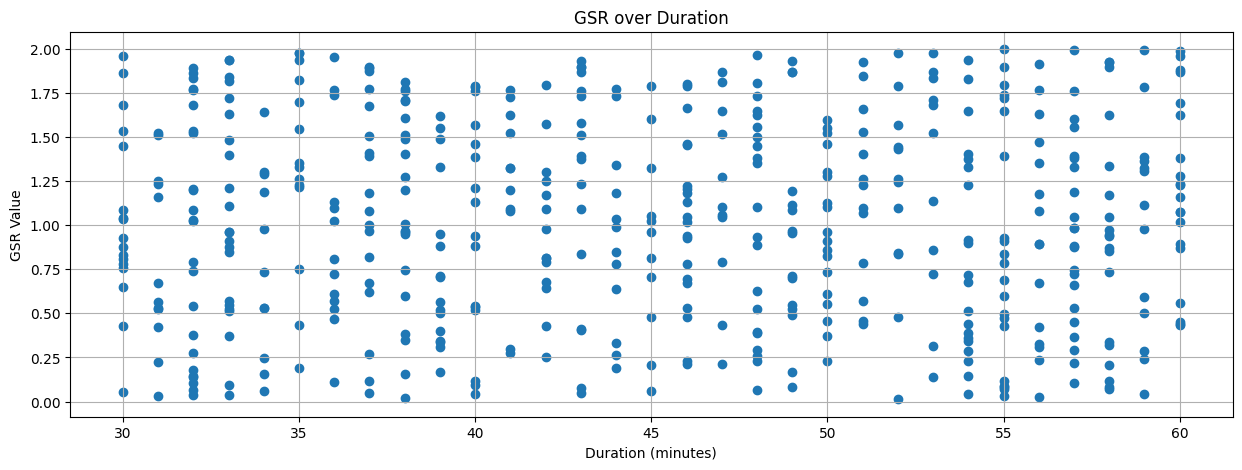

In [167]:
## Plotting dataset
import matplotlib.pyplot as plt

sample = df.sample(n=500)
timestamp = sample["Duration (minutes)"]
gsr_values = sample["GSR_Values"]

plt.figure(figsize=(15, 5))

plt.scatter(timestamp, gsr_values)

plt.title("GSR over Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("GSR Value")
plt.grid()
plt.show()


In [168]:
## Working of Isolation Tree Algorithm
from sklearn.ensemble import IsolationForest

feature_cols = ["GSR_Values", "Age", "Duration (minutes)", "Gender"]
X = df[feature_cols].values

iso = IsolationForest(
    n_estimators=500,
    contamination=0.05,
    random_state=42
)

iso.fit(X)

anomaly_score = iso.decision_function(X)
labels = iso.predict(X)

df["anomaly_score"] = anomaly_score
df["anomaly_label"] = labels

normal = df[df["anomaly_label"] == 1]
anomaly = df[df["anomaly_label"] == -1]

print(f"Normal: {len(normal)}")
print(f"Anomaly detected: {len(anomaly)}")

Normal: 475
Anomaly detected: 25


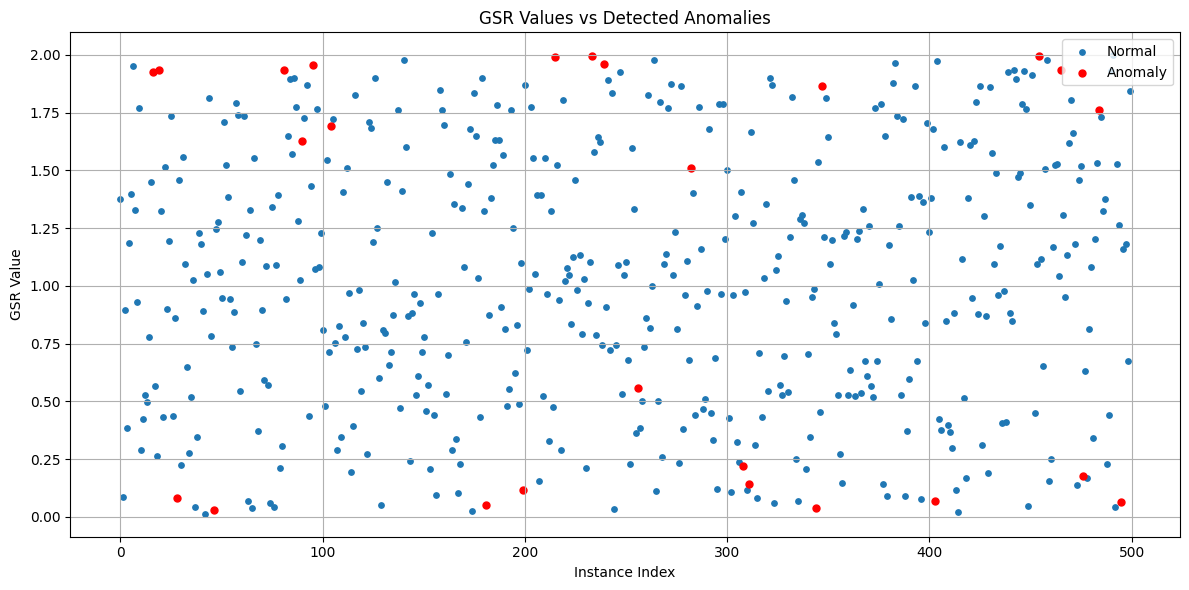

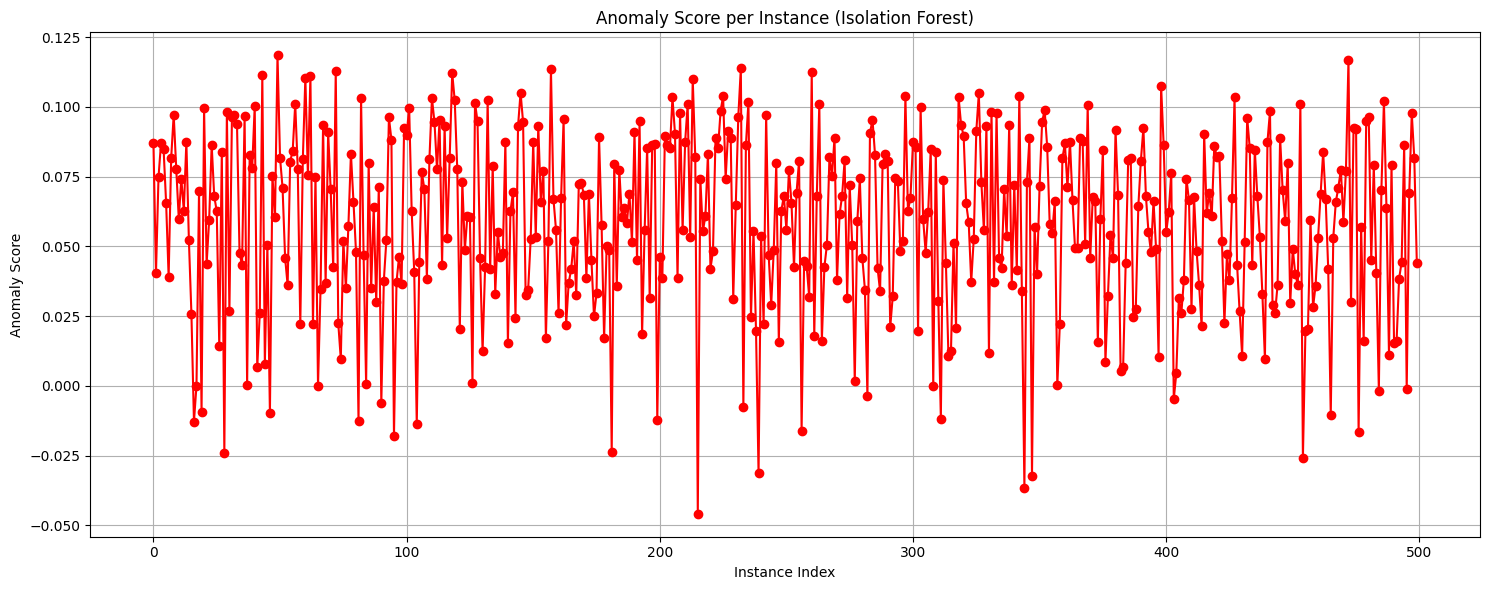

In [169]:
## Plotting output


plt.figure(figsize=(12, 6))
plt.scatter(
    normal.index,
    normal["GSR_Values"],
    s=15,
    label="Normal",
)

plt.scatter(
    anomaly.index,
    anomaly["GSR_Values"],
    s=25,
    c="r",
    label="Anomaly",
)

plt.title("GSR Values vs Detected Anomalies")
plt.xlabel("Instance Index")
plt.ylabel("GSR Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.plot(
    df.index,
    df["anomaly_score"],
    label="Anomaly Score",
    c="r",
    marker="o"
)

plt.title("Anomaly Score per Instance (Isolation Forest)")
plt.xlabel("Instance Index")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.tight_layout()
plt.show()